<a href="https://colab.research.google.com/github/dBalag/Chinook/blob/main/4_Chinook_variance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variance Analysis
is a technique to understand the variability or dispersion of data points in a dataset. In the context of the Chinook database, we can perform variance analysis on different numerical columns to understand how spread out the values are.

In [1]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load datasets
media_type = pd.read_csv('media_type.csv')
playlist = pd.read_csv('playlist.csv')
playlist_track = pd.read_csv('playlist_track.csv')
album = pd.read_csv('album.csv')
artist = pd.read_csv('artist.csv')
employee_cleaned = pd.read_csv('employee_cleaned.csv')
invoice_cleaned = pd.read_csv('invoice_cleaned.csv')
invoice_line = pd.read_csv('invoice_line.csv')
track_cleaned = pd.read_csv('track_cleaned.csv')
genre = pd.read_csv('genre.csv')
customer_cleaned = pd.read_csv('customer_cleaned.csv')

Saving album.csv to album.csv
Saving artist.csv to artist.csv
Saving customer_cleaned.csv to customer_cleaned.csv
Saving employee_cleaned.csv to employee_cleaned.csv
Saving genre.csv to genre.csv
Saving invoice_cleaned.csv to invoice_cleaned.csv
Saving invoice_line.csv to invoice_line.csv
Saving media_type.csv to media_type.csv
Saving playlist.csv to playlist.csv
Saving playlist_track.csv to playlist_track.csv
Saving track_cleaned.csv to track_cleaned.csv


### 1. Calculate the Variance of certain numerical columns.
It´s interesting to know the variance in columns as unit_price, quantity, milliseconds, bytes, unit_price & total. Let's forget id columns.


In [2]:
# Calculate variance for the numerical columns in invoice_line
invoice_line_variance = invoice_line.var()
print("\nVariance for Invoice Line Data:")
print(invoice_line_variance)


Variance for Invoice Line Data:
Unnamed: 0                   NaN
invoice_line_id    418320.000000
invoice_id          14193.118987
track_id           987634.463132
unit_price              0.047119
quantity                0.000000
dtype: float64




*   Unit Price: The small variance (0.047119) shows that the unit prices of tracks in the dataset are quite consistent, with only minor deviations from the mean price.
*   Quantity: The zero variance (0.000000) indicates that the quantity of each item sold is the same across all invoice lines, with every line having a quantity of 1. (dataset is fictitious and this value is fixed x every line of the invoice).



In [7]:
# Calculate variance for the numerical columns in track_cleaned dataset
import numpy as np # Import the numpy module
track_variance = track_cleaned.select_dtypes(include=np.number).var() # Select only numeric columns
print("\nVariance for Track Data:")
print(track_variance)


Variance for Track Data:
Unnamed: 0                NaN
track_id         1.022876e+06
album_id         6.687215e+03
media_type_id    3.369141e-01
genre_id         3.831862e+01
milliseconds     2.862308e+11
bytes            1.110759e+16
unit_price       5.712408e-02
dtype: float64



*   Milliseconds: The very high variance (2.862308e+11) suggests a wide range of track durations, from very short to very long.
*   Bytes: The extremely high variance (1.110759e+16) reflects a broad range of file sizes, indicating significant diversity in track sizes.
*   Unit Price: The small variance (*0.05712408e*) shows that the track prices are relatively consistent, with most prices close to the average.


In [10]:
# Calculate variance for the numerical columns in invoice_cleaned dataset
invoice_cleaned_variance = invoice_cleaned.select_dtypes(include=np.number).var() # Select only numeric columns
print("\nVariance for Invoide_Cleaned Data:")
print(invoice_cleaned_variance)


Variance for Invoide_Cleaned Data:
Unnamed: 0              NaN
invoice_id     14179.666667
customer_id      289.359997
total             22.518059
dtype: float64



*   The variance of 22.518059 for the total column in the invoice_cleaned dataset indicates that there is a moderate level of variability in the total invoice amounts. This suggests that while there are some invoices with total amounts close to the mean, there are also many invoices with total amounts that differ significantly from the mean.
*   This kind of analysis helps businesses understand the variability in their sales and can be useful for financial planning and analysis.



### 2. Visualize the Variance
Visualizing the variance can help us better understand the distribution of data. We can use box plots and histograms to visualize the variance.

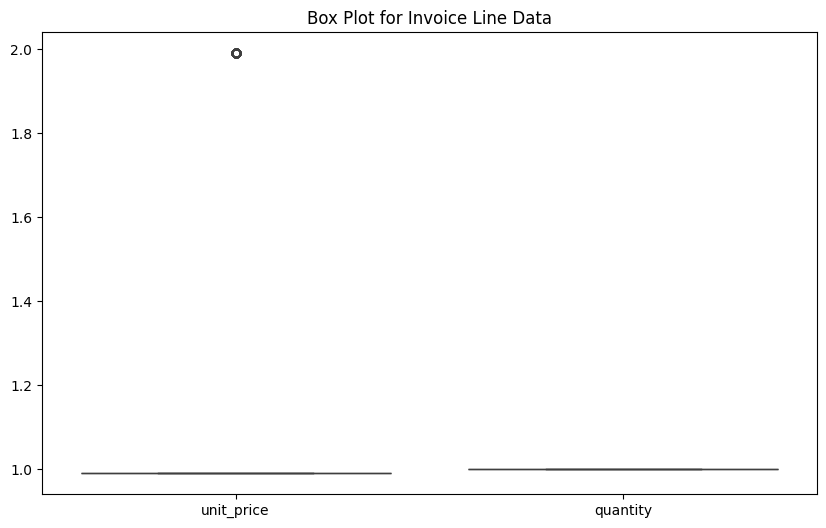

In [13]:
# Box plot for numerical columns in invoice_line
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=invoice_line[['unit_price', 'quantity']])
plt.title('Box Plot for Invoice Line Data')
plt.show()

Box Plots show the distribution of data and highlight any outliers. The wider the box, the more variance in the data, in this case no variance in quantity and very very low in unit_price hightlighting the outlier (2.0).

<Figure size 1000x600 with 0 Axes>

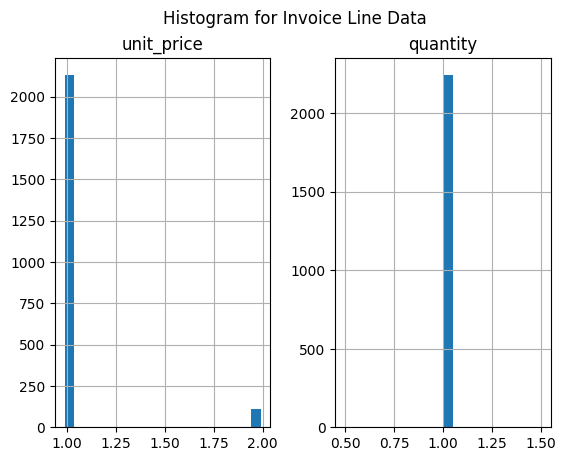

In [16]:
# Histogram for 'unit_price' and 'quantity' in invoice_line
plt.figure(figsize=(10, 6))
invoice_line[['unit_price', 'quantity']].hist(bins=20)
plt.suptitle('Histogram for Invoice Line Data')
plt.show()

These provide a visual representation of the distribution of the data. Peaks represent the most frequent values.

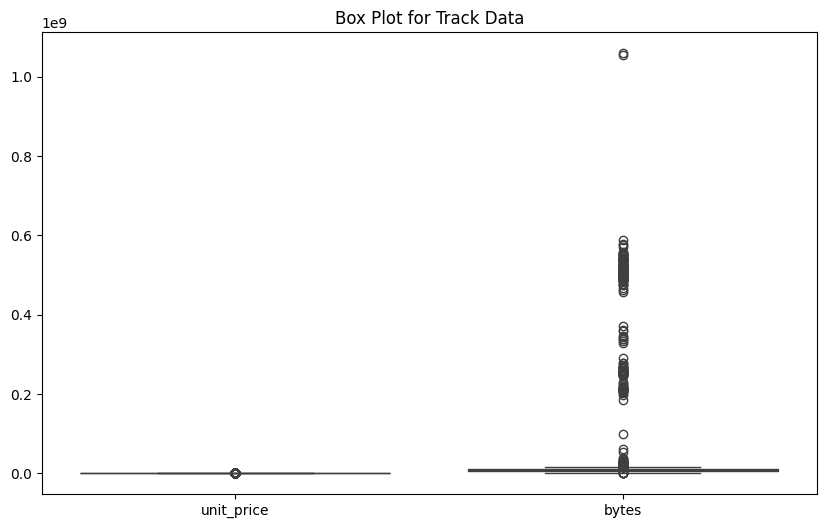

In [14]:
# Box plot for numerical columns in track
plt.figure(figsize=(10, 6))
sns.boxplot(data=track_cleaned[['unit_price', 'bytes']])
plt.title('Box Plot for Track Data')
plt.show()

Very low variance in bytes column with a lot of outliers.

<Figure size 1000x600 with 0 Axes>

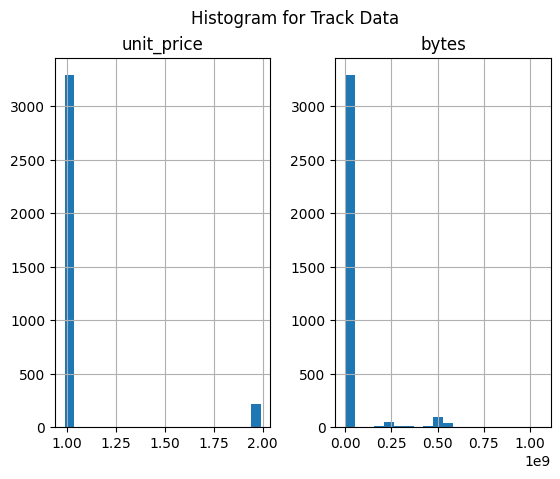

In [17]:
# Histogram for 'unit_price' and 'bytes' in track
plt.figure(figsize=(10, 6))
track_cleaned[['unit_price', 'bytes']].hist(bins=20)
plt.suptitle('Histogram for Track Data')
plt.show()

These provide a visual representation of the distribution of the data. Peaks represent the most frequent values.

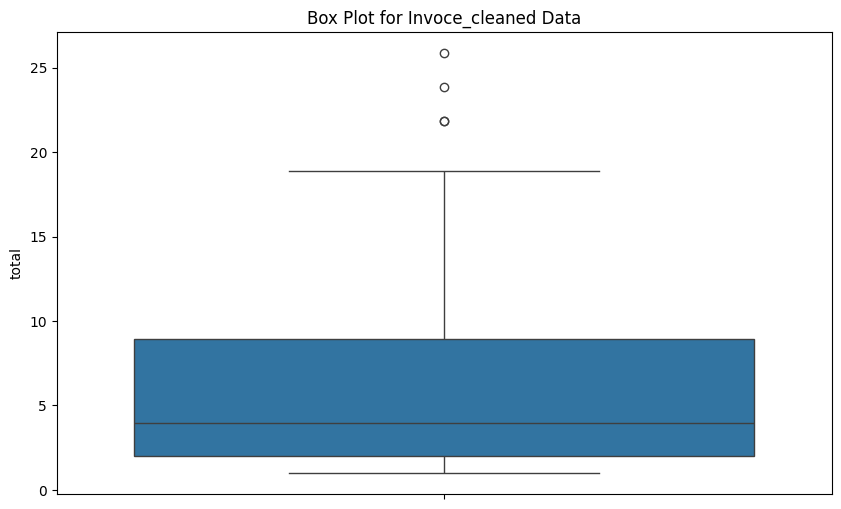

In [15]:
# Box plot for numerical columns in Invoice_cleaned
plt.figure(figsize=(10, 6))
sns.boxplot(data=invoice_cleaned[ 'total'])
plt.title('Box Plot for Invoce_cleaned Data')
plt.show()

Total column delivers some variance (biggest until now) with some outliers as well.

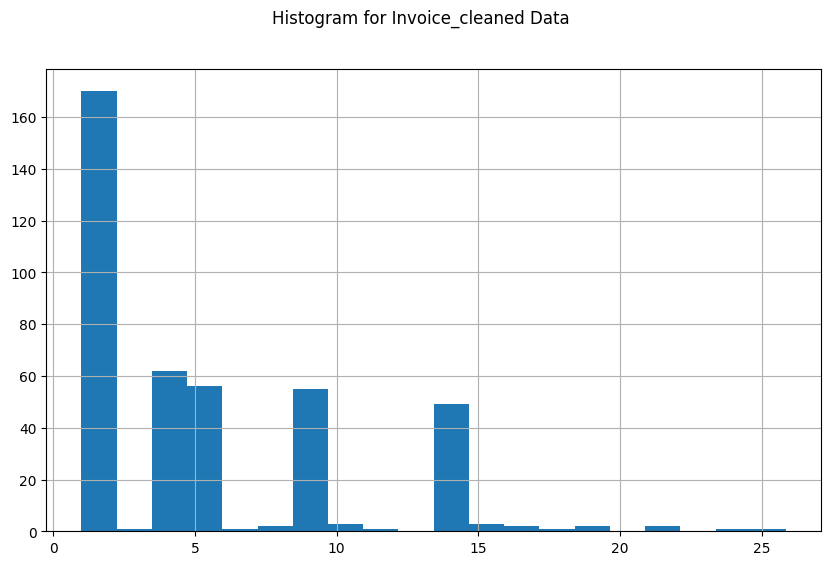

In [19]:
# Histogram for Invoice_cleaned
plt.figure(figsize=(10, 6))
invoice_cleaned['total'].hist(bins=20)
plt.suptitle('Histogram for Invoice_cleaned Data')
plt.show()

These provide a visual representation of the distribution of the data. Peaks represent the most frequent values.